In [1]:
%load_ext autoreload
%autoreload 2
from utils import view_pydot
from tree_definitions import binomial_tree_prices_x
from tree_definitions import binomial_tree_prices_v

from brownian_stock_simulator import BrownianStockSimulator
from european_call_option import EuropeanCallOption

# Stochastic Models for Finance and Insurance (Take Home Exam) 

# Problem 1
Consider two step $(N = 2)$ binomial model with $u = 2$, $d = \frac{1}{2}$ and $X_Y (0) = 4$. 
- Find the price and the hedging portfolio for a contract with a payoff $V(2) = \mathcal{I}(X_Y(2) \neq 4)Y(2)$.
- Find $V (0), V (1, H), V (1, T )$ and for the hedge the corresponding
positions in the asset $X$, that is $(\Delta^X (0), \Delta^X(1, H)$ and $\Delta^X(1, T ))$

We use

- $X(1,H)=uX(0)$
- $X(1,T)=dX(0)$
- $X(2,TT)=uX(1,H)$
- $X(2,TH)=X(2,HT)=dX(1,H)=uX(1,T)$
- $X(2,TT)=dX(1,T)$

to get the prices of $X$ at times $1,2$. 

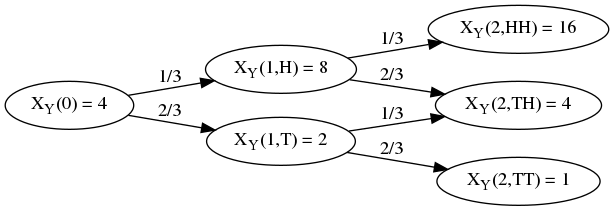

In [2]:
view_pydot(binomial_tree_prices_x)

We have,
$$
\begin{aligned}
    X_Y(0) &= u \cdot \mathbb{P}^Y(H) \cdot X_Y(0) + d \cdot (1-\mathbb{P}^Y(H)) \cdot X_Y(0) \\
    X_Y(0) &= u \cdot \mathbb{P}^Y(H) \cdot X_Y(0) + dX_Y(0) \cdot -d \cdot \mathbb{P}^Y(H) \cdot X_Y(0) \\
    1 &= \mathbb{P}^Y(H) \cdot (u-d) + d \\
    \mathbb{P}^Y(H) &= \frac{1-d}{u-d} \\
\end{aligned}
$$
and therefore in our case $$\mathbb{P}^Y(H)=\dfrac{1-1/2}{2-1/2}=\dfrac{2}{3}$$ and $$\mathbb{P}^Y(T)=1 - \mathbb{P}^Y(H) = \frac{1}{3}$$

To get the binomial tree for times $t = \{0,1\}$ for the contract with payoff $V(2) = \mathbb{1}(X_Y(2)\neq 4) \cdot Y(2)$, with $Y$ as the reference asset, we use the relationship:

$$V_Y(t) = V_Y(t+1,H)\cdot\mathbb{P}^Y(H) + V_Y(t+1,T) \cdot \mathbb{P}^Y(T)$$ and $$Y_X(t) = \frac{1}{X_Y(t)}$$

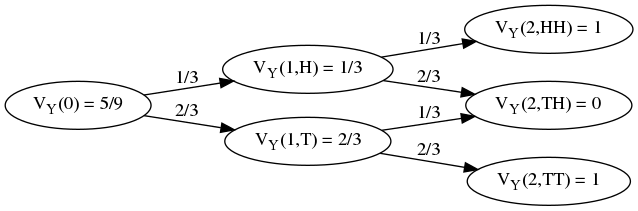

In [3]:
view_pydot(binomial_tree_prices_v)

Lastly we need the hedging positions $\Delta^X (0), \Delta^X(1, H)$ and $\Delta^X(1, T )$

$$
\begin{aligned}
    \Delta^X(0) &= \dfrac{V_Y(1,H) - V_Y(1,T)}{X_Y(1,H)-X_Y(1,T)} = \dfrac{1/3-2/3}{8-2} = \dfrac{-1}{18} \\
    \Delta^X(1,H) &= \dfrac{V_Y(2,HH) - V_Y(2,HT)}{X_Y(2,HH)-X_Y(2,HT)} = \dfrac{1-0}{16-4} = \dfrac{1}{12} \\
    \Delta^X(1,T) &= \dfrac{V_Y(2,TH) - V_Y(2,TT)}{X_Y(2,TH)-X_Y(2,TT)} = \dfrac{0-1}{4-1} = \dfrac{-1}{3}
\end{aligned}
$$

# Problem 2
Solve 

$$u_Y(t, x) = \mathbb{P}^Y[(L \leq X_Y(T) \leq U)| X_Y(t) = x]$$ for some $L < U$, where 

$$dX_Y(t) = \sigma X_Y(t) \cdot dW_Y(t)$$.

This corresponds to a contract $V$ with the payoff

$$V(T) = I(L \leq X_Y(T) \leq U) \cdot Y(T)$$

- Find the hedging portfolio for this contract (give both $\Delta X(t)$ and $\Delta X(t))$
- Write down the partial equation for the function $u^Y$ and check that your solution satisfies this equation.

# Problem 4
Write a Python code in a Jupyter notebook that does the following:

In [8]:
time_horizon=2
steps_count=250
sigma=0.5
init_stock_price=100
strike_price=50

## 4(a)
Simulate Brownian motion evolution and the stock price evolution that follows
stochastic differential equation
$dX_Y(t)=\sigma X_Y(t)dW_Y(t)$ Make plots of the Brownian increments, the corresponding Brownian motion
and the resulting stock price.

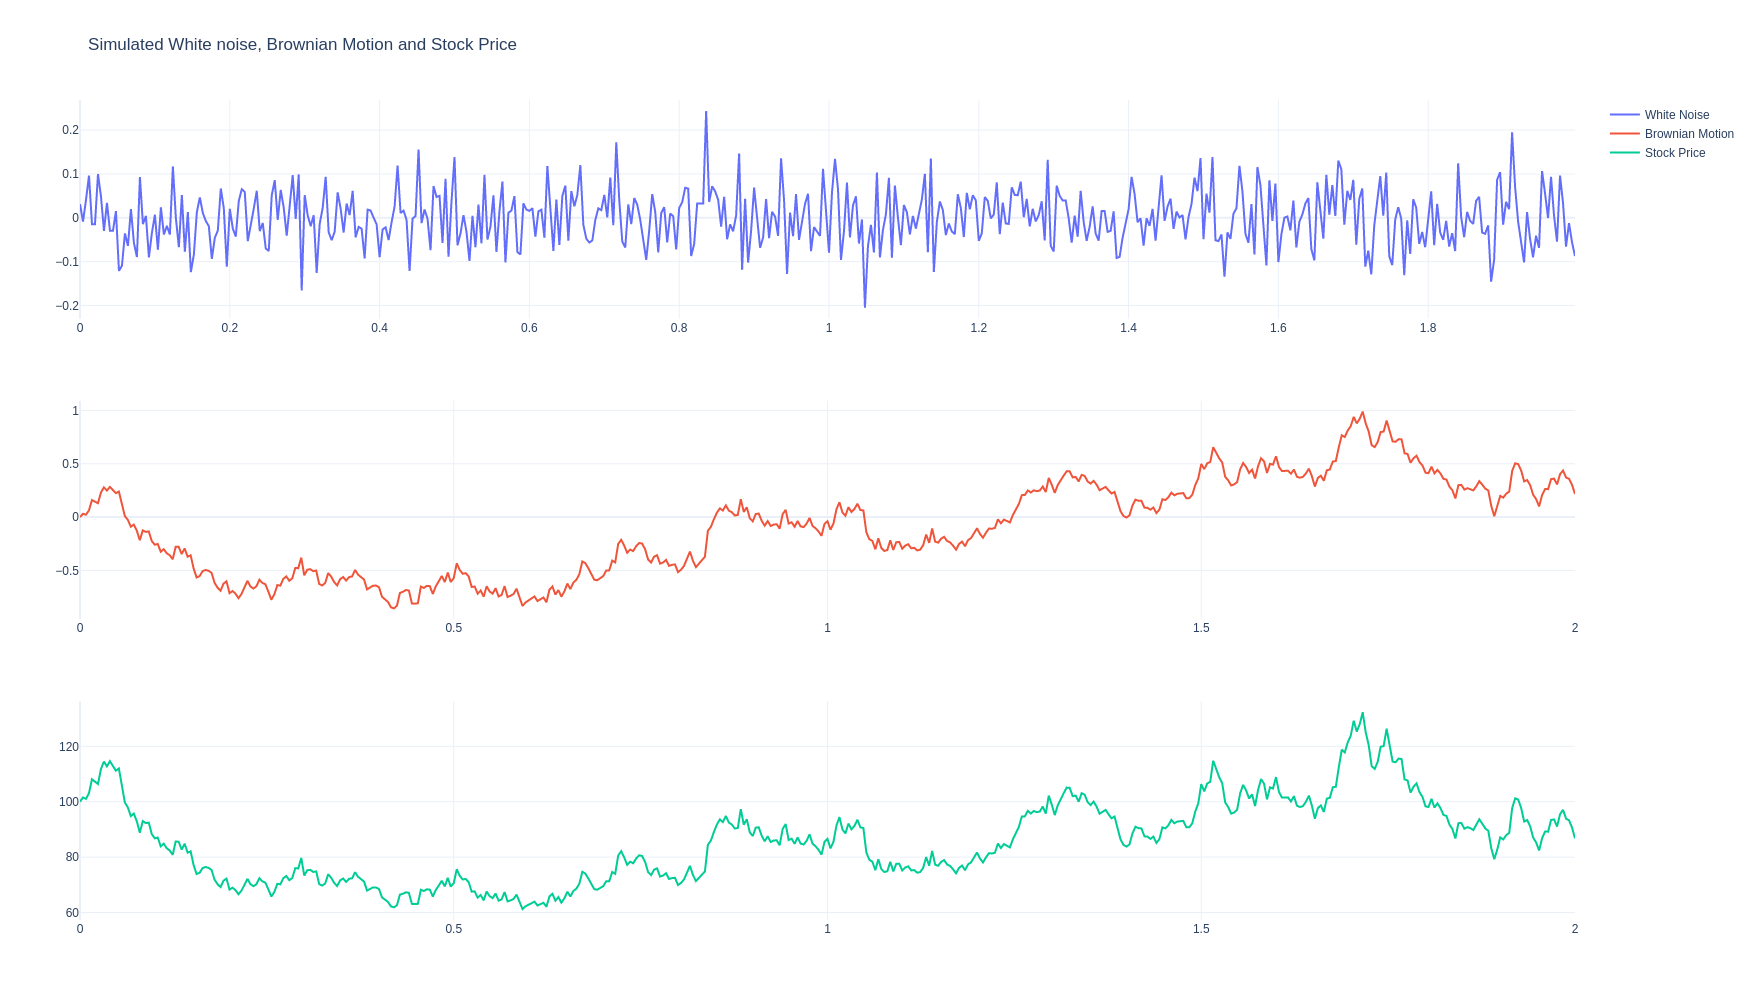

In [58]:
bss = BrownianStockSimulator(
    time_horizon=time_horizon,
    steps_count=steps_count,
    sigma=sigma
)
bss.simulate(init_stock_price=init_stock_price)
bss.plot()

## 4(b)
Write a function that computes the price of a European call option with a payoff $(X)_Y(T) − K)_{+}$ units of $Y$ as a function of $X_Y(t), K, t, T, \sigma$. This corresponds to the Black-Scholes formula. Write a function that computes $ \Delta^X(t)$, the hedging position for the option. Construct a hedging portfolio for this option using the data from a simulated path in part (a). Plot the corresponding evolution of the European call option and its hedging portfolio in one graph. Plot the hedging position $\Delta^X(t)$ in a separate graph. Simulate Brownian motion evolution and the stock price evolution that follows stochastic differential equation $dX_Y(t)=\sigma X_Y(t)dW_Y(t)$ Make plots of the Brownian increments, the corresponding Brownian motion and the resulting stock price.

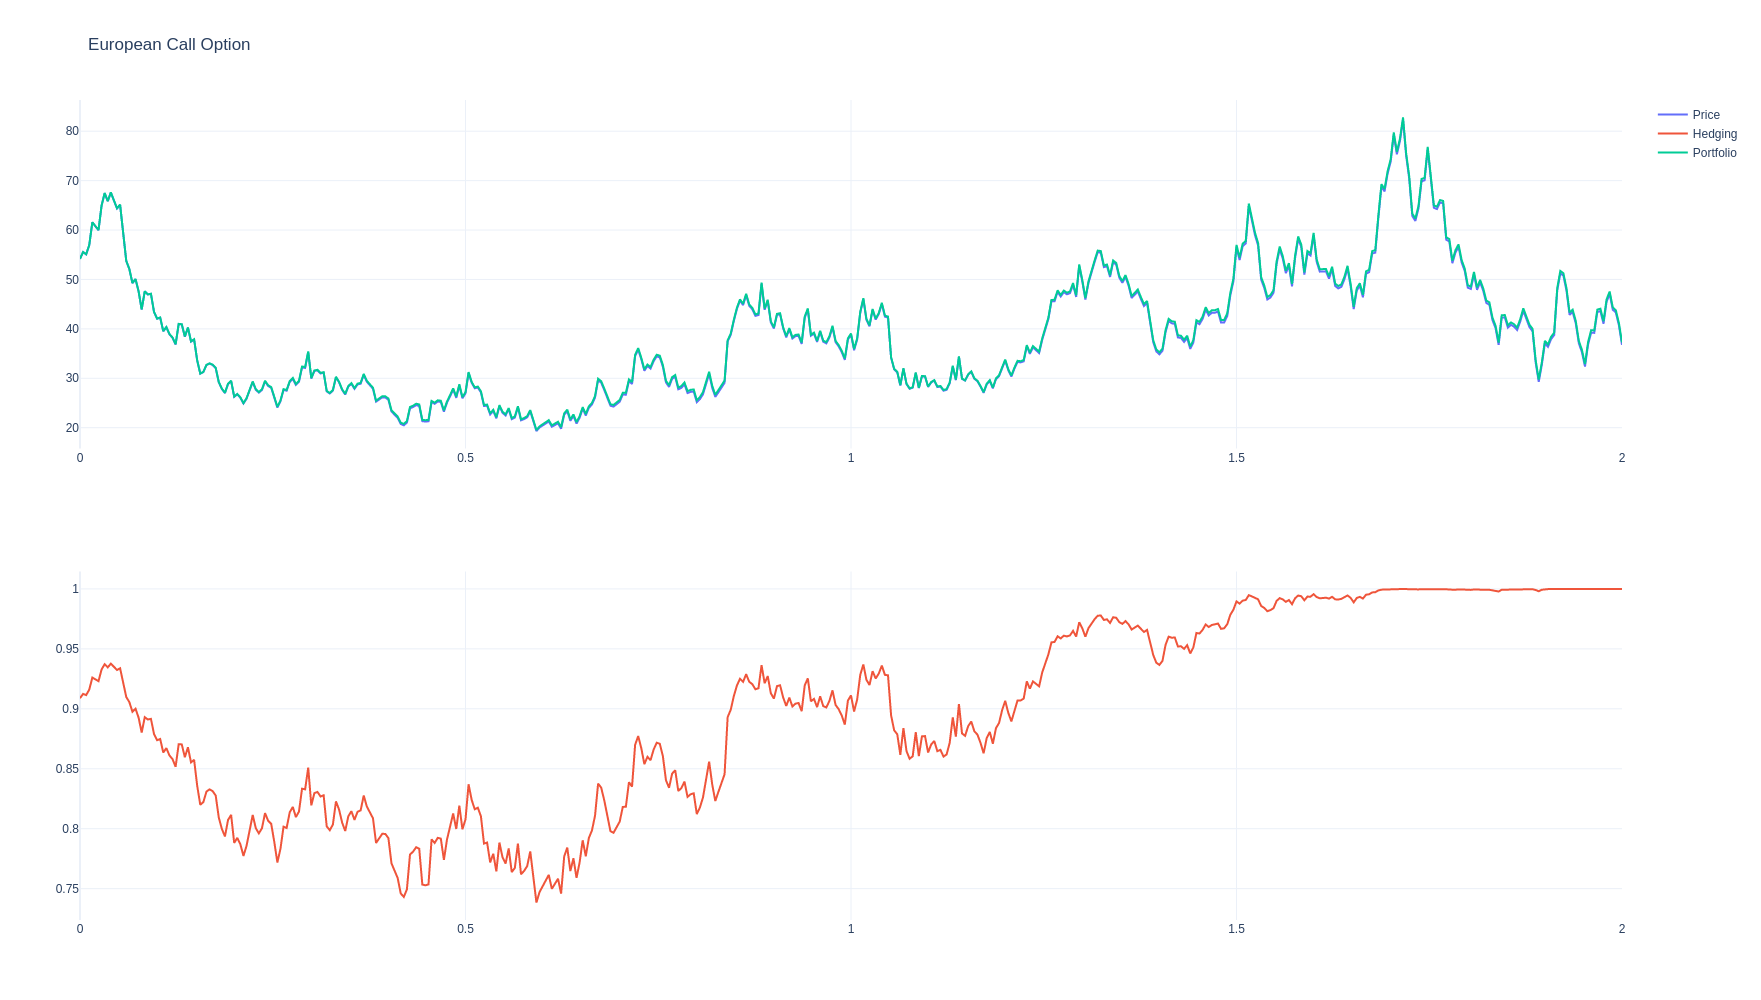

In [60]:
eu_call = EuropeanCallOption(
    strike_price=strike_price,
    end_time=time_horizon,
    steps_count=steps_count,
    sigma=sigma
)
eu_call.simulate(bss.price);
eu_call.plot();